# Further introduction to Python

This notebook includes a few examples demonstrating basic features of Python that did not make it into the main introduction document. Each section can be ran independently of every other.

## Function arguments

In the main introduction document, the following square solver function was used as an example:

In [1]:
def solve_quadratic(a, b, c):  
    """Solves a*x**2 + b*x + c = 0 and returns both roots"""  
    d = b**2.0 - 4 * a * c  
    d = complex(d)  
    x1 = (-b + d**0.5) / (2*a)  
    x2 = (-b - d**0.5) / (2*a)  
    return x1, x2  

# Test it out
print(solve_quadratic(1, 1, 0), solve_quadratic(1, 0, 2))

(0j, (-1+0j)) ((8.659560562354934e-17+1.4142135623730951j), (-8.659560562354934e-17-1.4142135623730951j))


Note that the arguments in the call are provided in the same order as in the definition and all three arguments are present. An attempt to call the function with a different number of arguments would result in an error:

In [2]:
solve_quadratic(1, 1) # ERROR!

TypeError: solve_quadratic() missing 1 required positional argument: 'c'

This can be avoided by providing default values for the arguments. For example, we could update the definition of the function slightly as follows:

In [3]:
def solve_quadratic(a, b, c = 0):  
    """Solves a*x**2 + b*x + c = 0 and returns both roots"""  
    d = b**2.0 - 4 * a * c  
    d = complex(d)  
    x1 = (-b + d**0.5) / (2*a)  
    x2 = (-b - d**0.5) / (2*a)  
    return x1, x2

Now, the third argument is optional and will default to $0$ when not provided. For example:

In [4]:
solve_quadratic(1, 1) # ERROR!

(0j, (-1+0j))

When calling functions, it is also possible to specify arguments by name instead of giving them in the particular order. For example:

In [5]:
solve_quadratic(a = 1, b = 1, c = 0)

(0j, (-1+0j))

This notation is not only much easier to read (the reader no longer needs to know the exact definition of the function to understand the call), but the arguments may also be provided out of order such as:

In [6]:
solve_quadratic(c = 0, b = 1, a = 1)

(0j, (-1+0j))

It is also possible to combine the two notations as long as all ordered arguments precede all named arguments:

In [7]:
solve_quadratic(1, c = 0, b = 1)

(0j, (-1+0j))

Another particularly elegant feature in Python is called *arbitrary argument lists*. It allows us to define functions that accept a variable number of arguments. Have a look at the example below and try to understand what is going on.

In [8]:
# "*" means that this function will work with any set of arguments. Within the function, they will be available as
# items of the list called "numbers" (well, technically this is a tuple; not a list)
def my_func(*numbers):
    """ Prints all passed arguments """
    print("You passed {} argument(s)".format(len(numbers)))  # format() is a method of type str that inserts
                                                             # the value provided as its argument in place of
                                                             # {}.
    print("Here they all are:", numbers)
    if len(numbers) != 0:
        print("The first argument is:", numbers[0])

# Now we can feed any arguments we want into this function and it will print all of them back
my_func()
my_func(1)
my_func(1, 2)
my_func(1, 2, 3)

# The reverse can also be done. It is possible to save all arguments to be passed into a function as a list
# and use "*" to "unpack" them
my_list = [1, 2, 3, 4]
my_func(*my_list)

You passed 0 argument(s)
Here they all are: ()
You passed 1 argument(s)
Here they all are: (1,)
The first argument is: 1
You passed 2 argument(s)
Here they all are: (1, 2)
The first argument is: 1
You passed 3 argument(s)
Here they all are: (1, 2, 3)
The first argument is: 1
You passed 4 argument(s)
Here they all are: (1, 2, 3, 4)
The first argument is: 1


The function `my_func()` takes an arbitrary number of arguments that can be accessed through the variable `numbers` within the body of the function. In this case, all arguments passed to the function must be ordered and not named. There is however a way to use named arguments with this feature too: see the official documentation ([https://docs.python.org/3/tutorial/controlflow.html](https://docs.python.org/3/tutorial/controlflow.html), section 4.7.4) to find out!

## Slicing

To demonstrate slicing, let's create a simple list:

In [1]:
my_list = ['James Holden', 'Joe Miller', 'Alex Kamal', 'Naomi Nagata', 'Amos Burton']

Any element of the list can be accessed by its numerical index starting with $0$:

In [2]:
print(my_list[2])

Alex Kamal


*Slicing* allows us to literally *slice* the list into pieces. For example, we may want to get a new list that only contains second through fourth elements of the original list:

In [3]:
sliced_list = my_list[2:5]    # 2:5 instead of 2:4 here because the last element in the slice is not included
print(sliced_list)

['Alex Kamal', 'Naomi Nagata', 'Amos Burton']


Negative indices may be used to count items from the end. For example, the following snippet slices the list such that the first and the last elements are discarded regardless of how long the list is:

In [4]:
sliced_list = my_list[1:-1]
print(sliced_list)

['Joe Miller', 'Alex Kamal', 'Naomi Nagata']


One of the indices in the slice can be omitted in which case the slice would start from the first element or end with the last element.

In [5]:
sliced_list = my_list[1:]    # Start with second element and until the end
print(sliced_list)

['Joe Miller', 'Alex Kamal', 'Naomi Nagata', 'Amos Burton']


In [6]:
sliced_list = my_list[:-1]    # Start with first element and until the penultimate one
print(sliced_list)

['James Holden', 'Joe Miller', 'Alex Kamal', 'Naomi Nagata']


Finally, a third index can be provided to the slice to skip elements throughout:

In [7]:
sliced_list = my_list[::2]    # Take odd-numbered elements only
print(sliced_list)

sliced_list = my_list[1::2]    # Take even-numbered elements only
print(sliced_list)

['James Holden', 'Alex Kamal', 'Amos Burton']
['Joe Miller', 'Naomi Nagata']


NumPy array support the same slicing notation that lists do; however, they also support conditional slicing as demonstrated below:

In [9]:
import numpy as np

# Remember that NumPy arrays support automatic iteration (native Python lists do not).
# This applies to both arithmetic and logical expressions. For example:
my_array = np.array([0, 1, 2, 3, 4])
print(my_array < 3)       # Prints    [ True  True  True False False]

# The result of such expression is an array of True/False values. This array can
# be used to slice other arrays of the same dimension, where the slice will only
# contain those elements that correspond to True:
print(my_array[my_array < 3])             # Prints [0 1 2]
got_characters = np.array(['Eddard Stark', 'Daenerys Targaryen', 'Jon Snow', 'Sansa Stark', 'Theon Greyjoy'])
print(got_characters[my_array < 3])       # Prints ['Eddard Stark' 'Daenerys Targaryen' 'Jon Snow']

# A caveat concerns "not", "or" and "and" operators. The following will produce an error:
print(my_array[(my_array < 3) and (my_array > 0)])    # Error! Comment this out to proceed!

# Instead, we need to use np.logical_or(), np.logical_and() and np.logical_not() functions:
print(my_array[np.logical_and(my_array < 3, my_array > 0)])    # Prints [1 2]

# Most of those have shorthands. Use "&" for "and" and "|" for "or", "~" for "not". E.g.:
print(my_array[(my_array < 3) & (my_array > 0)])        # Prints [1 2], again
print(my_array[(my_array > 3) | (my_array < 1)])        # Prints [0 4]

[ True  True  True False False]
[0 1 2]
['Eddard Stark' 'Daenerys Targaryen' 'Jon Snow']
[1 2]
[1 2]
[0 4]


## Data file handling

Python comes with a few low-level built-in functions that can read and write text files, just like any other high-level programming language would. The most essential of those are illustrated in the cell below (with apologies and gratitude to JRR Tolkien):

In [1]:
### File access session 1 ###
h = open("text.txt", "w")
h.write("Three rings for the Elven-kings under the sky\n")
h.write("Seven for the Dwarf-lords in their halls of stone\n")
h.write("Nine for mortal men doomed to die\n")
h.close()


### File access session 2 ###
h = open("text.txt", "w")
h.write("One for the Dark Lord on his dark throne\n")
h.write("In the Land of Mordor where the shadows lie.\n")
h.write("One for the Dark Lord on his dark throne\n")
h.close()

### File access session 3 ###
h = open("text.txt", "a")
h.write("One ring to rule them all, one ring to find them\n")
h.write("One ring to bring them all, and in the darkness bind them\n")
h.write("In the Land of Mordor where the shadows lie\n")
h.close()

### File access session 4 ###
h = open("text.txt", "r")
for text_line in h:
    print(text_line, end = '')      # end = '' suppresses automatic line breaks between print calls
h.close()

One for the Dark Lord on his dark throne
In the Land of Mordor where the shadows lie.
One for the Dark Lord on his dark throne
One ring to rule them all, one ring to find them
One ring to bring them all, and in the darkness bind them
In the Land of Mordor where the shadows lie


At the heart of it all is the `open()` function. It creates a *handler* variable (`h`) that can be used to manipulate the file. It is important that the file is closed at the end of the session to make it accessible to other processes.

`open()` accepts a second argument that sets the mode of the session. The full list of possible values can be found [here](https://docs.python.org/3/library/functions.html#open). The snippet above only uses three of them:

* `w` means "Write". When opened in this mode, the file gets emptied out and all the previous content is lost. If the file does not exist, a new empty file will be created. Since the cell above opens the file in this mode twice, the first three lines of text will be lost and the reader of the file will never know what happened to all the rings. A string of text can be written into a file opened in this mode with the `.write()` method.

* `a` means "Append". This mode is similar to `w`, but the old content remains. The new content is being added at the end of the file.

* `r` means "Read". In this mode, the file can only be read. Although one can use `.read()` to do so, the handler object itself (`h`) is iterable, allowing the lines to be extracted automatically in a loop, just like in the example above.

`\n`, when used in a string, adds a line break. Without it, every call of `.write()` would be writing into the same first line of the file.


<br>
<div class="alert alert-info">

<b>FYI:</b> Some of you may know that `\n` represents a proper line break only on Linux and Mac OS. Windows requires an additional character for this purpose called "carriage return", usually represented with `\r` (i.e., a Windows line break would be `\r\n` instead of just `\n`). This is a direct legacy of old typewriters, which required the carriage to be both shifted down and pulled back before the operator could begin typing a new line.
<br><br>
Fortunately, we do not need to worry about that here. Python is smart enough to automatically replace `\n` with `\r\n` on Windows and, in our context, it is acceptable to use `\n` regardless of the operating system in place.
</div>

NumPy is equipped with a number of routines for reading and writing complicated data structures from and into text files. The most commonly used of those is the pair `np.loadtxt()`/`np.savetxt()`:

In [2]:
import numpy as np

# Use native Python to create a text file
h = open("text.txt", "w")
h.write("# Comment, describing what this file is all about\n")
h.write("1 2 3\n")
h.write("4 5 6\n")
h.write("7 8 9\n")
h.close()

# Use NumPy to load it
data = np.loadtxt("text.txt")
print(data)
print("-------------------------")


# Update the data
data *= 2

# Use NumPy to save the updated data
np.savetxt('text.txt', data, header = "Updated comment")

# Use native Python to read the updated file
h = open("text.txt", "r")
for text_line in h:
    print(text_line, end = '')
h.close()

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-------------------------
# Updated comment
2.000000000000000000e+00 4.000000000000000000e+00 6.000000000000000000e+00
8.000000000000000000e+00 1.000000000000000000e+01 1.200000000000000000e+01
1.400000000000000000e+01 1.600000000000000000e+01 1.800000000000000000e+01


Very often, data will be represented as a table with a fixed number of rows and columns such as in the case above. Every column would represent a quantity and every row would represent a data point. Python allows different columns can be read into different variables with `unpack=True` and selected with `usecols=[...]`. Consider the example below:

In [3]:
column_1, column_3 = np.loadtxt("text.txt", unpack = True, usecols = [0, 2]) # Indexing begins with 0!
print(column_1)
print(column_3)

[ 2.  8. 14.]
[ 6. 12. 18.]


By default, `np.loadtxt()` assumes that comments are prefixed with `#` and everything that is not a comment or an empty line is the data of interest. It assumes that the columns are separated with whitespace (this includes spaces and tabulation characters) and rows are separated with line breaks (`\n`). It also assumes that every value is a number and there is an equal number of columns in every row. `np.loadtxt()` has optional arguments that allow us to change some of this behavior; however, `np.loadtxt()` is generally not suitable for loading text files that do not obey a well-defined formatted structure.

Real data files may have comments in the beginning and the end of the file without any prefixes, which means that `np.loadtxt()` will not be able to load them right away.

Consider the example below that attempts to use `np.loadtxt()` to load a file with an unlabeled comment and fails:

In [4]:
# Create a text file with an unlabaled comment
h = open("text.txt", "w")
h.write("Header Comment\n")   # No prefix!
h.write("1 2 3\n")
h.write("4 5 6\n")
h.write("7 8 9\n")
h.write("Footer Comment\n")   # Same here
h.close()

# ERROR!
column_1, column_3 = np.loadtxt("text.txt", unpack = True, usecols = [0, 2])

IndexError: list index out of range

To handle text files that do not comply with the standard expected by `np.loadtxt()`, NumPy implements a similar function: `np.genfromtxt()`. `np.genfromtxt()` preserves most of the arguments of `np.loadtxt()`, but introduces a few more. For example, `invalid_raise=False` will suppress errors when a faulty line is encountered.

In [5]:
# Create a text file with an unlabaled comment
h = open("text.txt", "w")
h.write("Header Comment\n")   # No prefix!
h.write("1 2 3\n")
h.write("4 5 6\n")
h.write("7 8 9\n")
h.write("Footer Comment\n")   # Same here
h.close()

# No errors! (we may be getting a warning instead, but the code will continue running)
column_1, column_3 = np.genfromtxt("text.txt", unpack = True, usecols = [0, 2], invalid_raise = False)
print(column_1)
print(column_3)

[1. 4. 7.]
[3. 6. 9.]


C:\Users\Roman\Anaconda\envs\py3\lib\site-packages\ipykernel_launcher.py:11: ConversionWarning: Some errors were detected !
    Line #1 (got 2 columns instead of 2)
    Line #5 (got 2 columns instead of 2)
  # This is added back by InteractiveShellApp.init_path()


## Linear algebra

As powerful as NumPy arrays may be, they **do not** behave like vectors and matrices by default. For example...

In [1]:
import numpy as np

a = np.array([[1, 2], [3, 4]])  # Some random "matrix"
b = np.array([[1, 0], [0, 1]])  # The identity "matrix"

print(a * b) # Should be the same as "a" (by matrix multiplication), but it won't be

...when multiplying two 2D arrays, Python will carry out the multiplication element by element instead of performing a proper matrix multiplication. However, there are at least two ways to make Python respect matrix multiplication rules. In the simplest case, the multiplication can be performed with `np.dot()`:

In [2]:
print(np.dot(a, b)) # Remains the same as "a" because it is matrix-multiplied by identity

[[1 2]
 [3 4]]


Alternatively, we could typecast a and b into a matrix datatype with np.matrix(). Variables of this type behave like ordinary matrices:

In [3]:
a = np.matrix(a); b = np.matrix(b)

print(a * b)

[[1 2]
 [3 4]]


Even better, we can now apply mathematical operators and they will be handled "the matrix way". E.g.:

In [4]:
print("wake up neo")

# Matrix power
print(a ** 2)

wake up neo
[[ 7 10]
 [15 22]]


Nonetheless, be advised that this does not extend to built-in mathematical functions like `np.log()` and the like. If you need to apply one of those to your matrix (an unlikely situation in this course), use [specialized implementations](https://docs.scipy.org/doc/scipy/reference/linalg.html).

Just like everything else, matrices are objects with attributes. The most relevant attributes here are `.I` which returns the inverse and `.T` which returns the transpose:

In [5]:
# Matrix inverse
print(a.I)

# Matrix transpose
print(a.T)

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1 3]
 [2 4]]


Inverting a matrix is equivalent to solving a system of simultaneous first-order equations. For example, consider the following system:

$$
\begin{cases}
1x + 2y =5 \\
3x + 4y = 6
\end{cases}
$$

the system may be solved using matrices:

In [6]:
M = np.matrix([[1, 2], [3, 4]]).T    # Matrices can be created from lists too!
b = np.matrix([5, 6])                # Vectors are nothing more than 1D matrices here

a = b * M.I

# A matrix will require two indices even if it's a vector, as Python needs to somehow remember whether this is a
# column vector or a row vector
print("x =", a[0, 0])
print("y =", a[0, 1])

x = -4.0
y = 4.5


Have a closer look at `M` in the code cell above. The number of rows corresponds to the number of variables (in our case, there are two: $x$ and $y$). The number of columns corresponds to the number of equations (again, two here). Assuming the system to be fully linearly independent, the number of columns must match the number of rows to be solvable exactly, i.e. the matrix must be square.

If the number of variables (rows) is less than the number of equations (columns), the system is called *underdetermined*. An underdetermined system does not contain enough information to be fully solvable. Yet, Python is able to compute the inverse of `M` without errors:

In [7]:
M = np.matrix([[1, 2, 3], [4, 5, 6]]).T
print(M.I)

[[-0.94444444 -0.11111111  0.72222222]
 [ 0.44444444  0.11111111 -0.22222222]]


Disappointingly, this is not black magic (yet). Python is smart enough to see that the system is underdetermined. In such cases, it automatically redefines `.I` to compute the so-called *pseudoinverse* matrix instead, whose symbolic definition is:

$$M^{+} = (M^T M)^{-1}\ M^T$$

where the superscripts $+$, $-1$ and $T$ stand for pseudoinverse, inverse and transpose respectively. In fact, this behavior can be suppressed if instead of `.I` we either call `np.linalg.inv()` for the standard inverse or `np.linalg.pinv()` for the pseudoinverse:

In [8]:
# First, compute the pseudoinverse (should be the same as M.I)
print(np.linalg.pinv(M))

# Now, compute the pseudoinverse using the formula (should, again, be the same)
print(np.linalg.inv(M.T * M) * M.T)

# Now try to compute the regular inverse (won't work, because the system is underdetermined)
print(np.linalg.inv(M))   # ERROR!

[[-0.94444444 -0.11111111  0.72222222]
 [ 0.44444444  0.11111111 -0.22222222]]
[[-0.94444444 -0.11111111  0.72222222]
 [ 0.44444444  0.11111111 -0.22222222]]


LinAlgError: Last 2 dimensions of the array must be square

Pseudoinverse matrices can be incredibly useful. For underdetermined systems, they give *one* of the possible solutions, which is sometimes needed. Of course, there will be other solutions too, as the system does not contain enough information to pinpoint one specific solution.

The true power of pseudoinverse is revealed when it is applied to *overdetermined* systems. Such systems have more equations than variables and, hence, contain "too much" information. In other words, this means that individual equations contradict each other and cannot be solved *precisely*. Nonetheless, one may still attempt to find a solution that *approximates* all the equations as closely as possible. I.e., one may attempt a least squares optimization. Most important, this optimized least squares solution is exactly what the pseudoinverse gives us when the system is overdetermined.

For example, we can use the pseudoinverse to fit a straight line to a dataset. The relevant system of equations in this case is:

$$
\begin{cases}
x_1m  + 1c = y_1 \\
x_2m  + 1c = y_2 \\
x_3m  + 1c = y_3 \\
\dots
\end{cases}
$$

where $m$ and $c$ are the best-fit parameters and $y_n$ and $x_n$ are the data series.

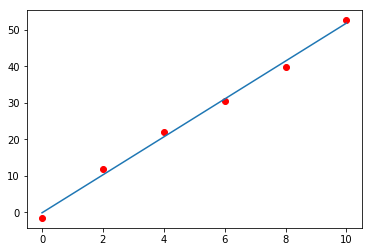

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a test dataset (with noise)
x = np.linspace(0, 10, 6)
y = 5 * x + 2 + np.random.normal(0, 2, 6)
plt.plot(x, y, 'ro')

# Now use pseudoinverses to get the best fit line
M = np.matrix([x, np.ones(len(x))])       # Set up our overdetermined system. np.ones() returns an array of ones
b = np.matrix(y)
coef = b * np.linalg.pinv(M)

# Plot the fit out
plt.plot(x, np.poly1d(np.array(coef)[0])(x))